<a href="https://colab.research.google.com/github/SuryARavichan/PYTHON-FOR-DATA-SCIENCE-BDA-/blob/main/PDS_notebook6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


Data Cleaning and Exploratory Analysis

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import function to perform linear regression using OLS
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load the Life expectancy dataset and display the first five records 

In [ ]:
# load the csv file
df_lifeExp = pd.read_csv('/content/drive/My Drive/Python Basics/Life_Expectancy.csv')

# display the first five observations
df_lifeExp.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [ ]:
# check the size of the dataframe
df_lifeExp.shape

(182, 20)

In [ ]:
# use 'info()' to understand the dataset
df_lifeExp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

**Interpretation:** The variables 'Country' and 'Status' are categorical. All the remaining variables are numerical.

<a id="eda"> </a>
## Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# find total number of missing values in column 'Life_Expectancy'
df_lifeExp.Life_Expectancy.isnull().sum()

9

We can see that the target variable contains 9 missing value records, hence we find the index values of such records.

In [ ]:
# isnull() returns the boolean output, returns True for record where null value is present
na_data = df_lifeExp.Life_Expectancy.isnull() 

# obtain a list of all records where indicating value is true 
na_data.index[na_data == True].tolist()

[46, 100, 104, 111, 118, 122, 135, 138, 168]

In [ ]:
# drop all the records for which target variable information is missing by index
df_lifeExp = df_lifeExp.drop(df_lifeExp.index[[46, 100, 104, 111, 118, 122, 135, 138, 168]])

# find total number of missing values in column 'Life_Expectancy'
df_lifeExp.Life_Expectancy.isnull().sum()

0

In [ ]:
df_lifeExp.shape

(173, 20)

After finding the records where information about life expectancy was missing we have altogether dropped them. This is because these records can niether be used for training nor evaluation. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# check the size of the dataframe
df_lifeExp.shape

(173, 20)

In [ ]:
Total = df_lifeExp.isnull().sum().sort_values(ascending=False)  
Total

Alcohol              166
Population            34
GDP                   21
Hepatitis B            9
Schooling              7
Income_Index           7
Malnourished5_9        2
Malnourished10_19      2
BMI                    2
Country                0
HIV                    0
Polio                  0
Diphtheria             0
Year                   0
Underfive_Deaths       0
Measles                0
Infant_Deaths          0
Adult_Mortality        0
Status                 0
Life_Expectancy        0
dtype: int64

In [ ]:
# display the total number of null values in each column of dataframe

# 'ascending = False' sorts values in the descending order
Total = df_lifeExp.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (df_lifeExp.isnull().sum()*100/df_lifeExp.isnull().count()).sort_values(ascending=False)  

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
Alcohol,166,95.953757
Population,34,19.653179
GDP,21,12.138728
Hepatitis B,9,5.202312
Schooling,7,4.046243
Income_Index,7,4.046243
Malnourished5_9,2,1.156069
Malnourished10_19,2,1.156069
BMI,2,1.156069
Country,0,0.000000


We can see that out of 173 entries the variable 'Alcohol' has missing values for 166 records, i.e 95% of the data is missing, hence we can drop this variable from the dataframe.

In [ ]:
# drop the variable 'Alcohol' from the dataframe
df_lifeExp = df_lifeExp.drop("Alcohol",axis=1)

We impute the other missing values in the data.

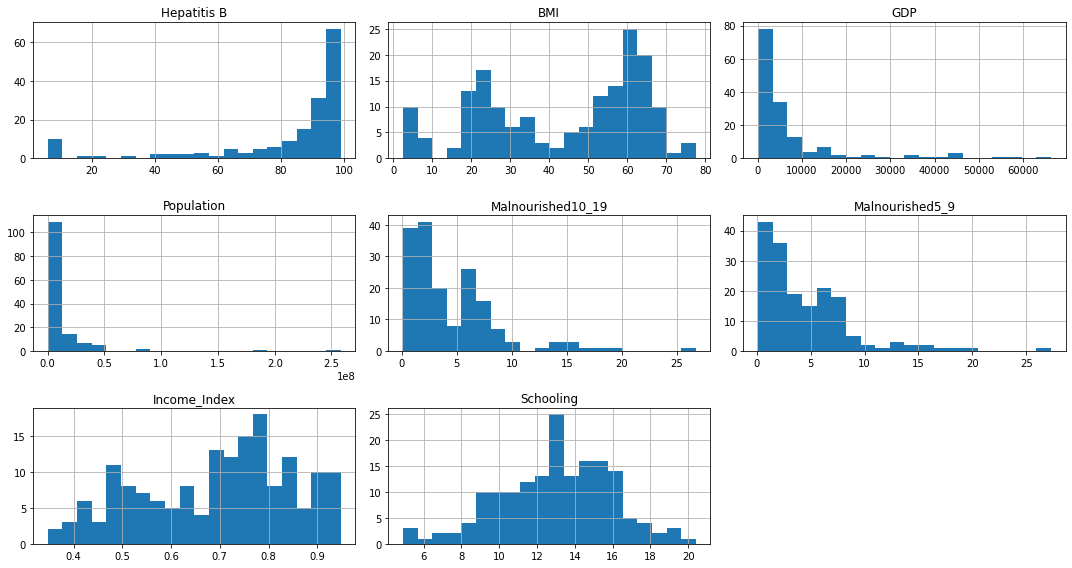

In [ ]:
# extract all the variables with missing values in a new dataframe 'df_missing_values'
df_missing_values = df_lifeExp[['Hepatitis B','BMI','GDP','Population','Malnourished10_19',
                                'Malnourished5_9','Income_Index','Schooling']]

# plot histogram of all variables which have missing values
# set the number of bins to 20
# set the figure size using 'figsize'
df_missing_values.hist(bins = 20, figsize = (15,8))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [ ]:
df_missing_values.skew()

Hepatitis B         -2.010876
BMI                 -0.390623
GDP                  2.845593
Population           6.053277
Malnourished10_19    2.003794
Malnourished5_9      2.009007
Income_Index        -0.380657
Schooling           -0.277173
dtype: float64

Depending on the distribution of each variable, we will do the imputation of missing values with mean and median. For skewed variables we use median for imputation and for remaining variables we impute with mean.

In [ ]:
# impute skewed variables with median

# impute for variable 'GDP'
df_lifeExp['GDP'] = df_lifeExp['GDP'].fillna(df_lifeExp['GDP'].median())

# impute for variable 'Hepatitis B'
df_lifeExp['Hepatitis B'] = df_lifeExp['Hepatitis B'].fillna(df_lifeExp['Hepatitis B'].median())


# impute for variable 'Malnourished10_19'
df_lifeExp['Malnourished10_19'] = df_lifeExp['Malnourished10_19'].fillna(df_lifeExp['Malnourished10_19'].median())


# impute for variable 'Malnourished5_9'
df_lifeExp['Malnourished5_9'] = df_lifeExp['Malnourished5_9'].fillna(df_lifeExp['Malnourished5_9'].median())


# impute for variable 'Population'
df_lifeExp['Population'] = df_lifeExp['Population'].fillna(df_lifeExp['Population'].median())

In [ ]:
# impute remaining variables with mean 

# impute for variable 'BMI'
df_lifeExp['BMI'] = df_lifeExp['BMI'].fillna(df_lifeExp['BMI'].mean())

# impute for variable 'Income_Index'
df_lifeExp['Income_Index'] = df_lifeExp['Income_Index'].fillna(df_lifeExp['Income_Index'].mean())

# impute for variable 'Schooling' 
df_lifeExp['Schooling'] = df_lifeExp['Schooling'].fillna(df_lifeExp['Schooling'].mean())

In [ ]:
# display the total number of null values in each variable of the dataframe
df_lifeExp.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

In [ ]:
df_lifeExp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 181
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            173 non-null    object 
 1   Year               173 non-null    int64  
 2   Status             173 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      173 non-null    int64  
 5   Hepatitis B        173 non-null    float64
 6   Measles            173 non-null    int64  
 7   BMI                173 non-null    float64
 8   Underfive_Deaths   173 non-null    int64  
 9   Polio              173 non-null    int64  
 10  Diphtheria         173 non-null    int64  
 11  HIV                173 non-null    float64
 12  GDP                173 non-null    float64
 13  Population         173 non-null    float64
 14  Malnourished10_19  173 non-null    float64
 15  Malnourished5_9    173 non-null    float64
 16  Income_Index       173 non

Thus, there are no missing values in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# check the size of the dataframe
df_lifeExp.shape

(173, 19)

Since the variable `Country` has all unique values we can drop this variable from the dataframe.

In [ ]:
# drop the variable 'Country' from the dataframe
df_lifeExp = df_lifeExp.drop("Country",axis = 1)

In [ ]:
# display count of unique values in the column
df_lifeExp.Year.value_counts()

2015    172
2013      1
Name: Year, dtype: int64

We can see that majority of the records take the same value for 'Year' i.e 2015, hence we can drop the variable 'Year'.

In [ ]:
# drop the variable 'Year' from the dataframe
df_lifeExp = df_lifeExp.drop("Year",axis=1) 

The variable `Underfive_Deaths` gives the number of deaths for age group 0-5 which includes the age group 0-1, hence we can eliminate the variable `Infant_Deaths` as it provides no new information.

In [ ]:
# drop the variable 'Infant_Deaths' from the dataframe
df_lifeExp = df_lifeExp.drop("Infant_Deaths",axis=1)

We use the shape function to see the size of final dataset after removing redundant features.

In [ ]:
# check the size of the dataframe
df_lifeExp.shape

(173, 16)

In [ ]:
df_lifeExp['Status'].value_counts()

Developing    141
Developed      32
Name: Status, dtype: int64

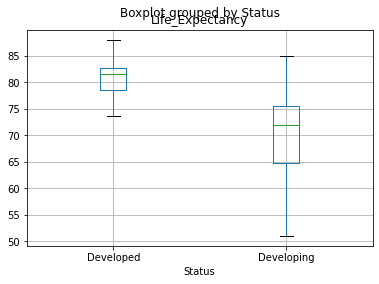

In [ ]:
df_lifeExp.boxplot(column='Life_Expectancy',by='Status')

4. Perform dummy encoding for appropriate variables of the dataset if required

There is only one categroical variable `Status`, here we use (n-1) dummy encoding.

In [ ]:
# use 'drop_first' to create (n-1) dummy variables
df_lifeExp['Status'] = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True)

According to the encoding: `Developing = 1` and `Developed = 0`

In [ ]:
# display head of the data
df_lifeExp.head(5)

,Status,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,1,263.0,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,1,74.0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,1,19.0,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,1,335.0,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,1,13.0,99.0,0,47.7,0,86,99,0.2,13566.954100,2174645.0,3.3,3.3,0.784,13.9,76.4


In [ ]:
df_lifeExp['Status'].value_counts()

1    141
0     32
Name: Status, dtype: int64

5. How status of the country affects GDP?

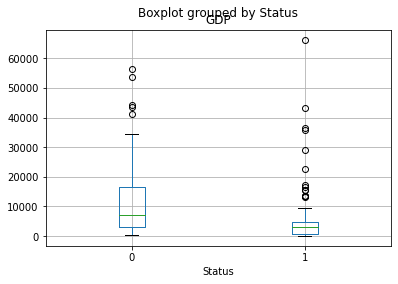

In [ ]:
df_lifeExp.boxplot(column='GDP',by='Status')

6. How status of the country affects Adult Mortality?

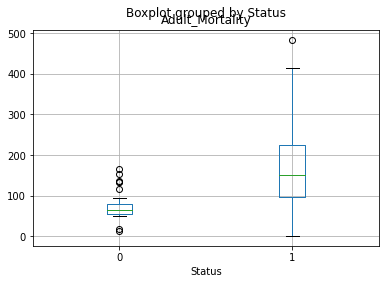

In [ ]:
df_lifeExp.boxplot(column='Adult_Mortality',by='Status')

7.How status of the country affects Life Expectancy?

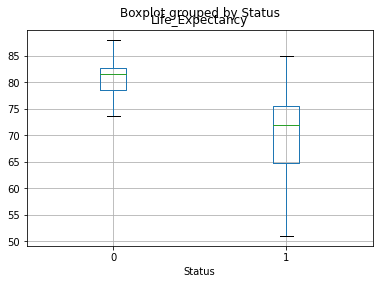

In [ ]:
df_lifeExp.boxplot(column='Life_Expectancy',by='Status')

8.How Adult Mortality rate of the country affects Life Expectancy?

In [ ]:
df_lifeExp.columns

Index(['Status', 'Adult_Mortality', 'Hepatitis B', 'Measles ', 'BMI',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Malnourished5_9', 'Income_Index', 'Schooling',
       'Life_Expectancy'],
      dtype='object')

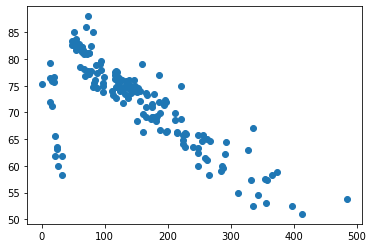

In [ ]:
plt.scatter(df_lifeExp['Adult_Mortality'],df_lifeExp['Life_Expectancy'])

In [ ]:
np.corrcoef(df_lifeExp['Adult_Mortality'],df_lifeExp['Life_Expectancy'])

array([[ 1.        , -0.77388926],
       [-0.77388926,  1.        ]])

9.How Income Index of the country affects Life Expectancy?

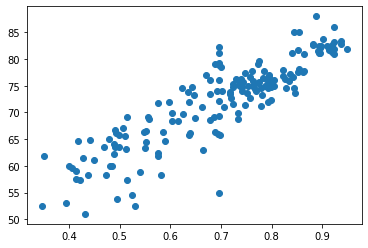

In [ ]:
plt.scatter(df_lifeExp['Income_Index'],df_lifeExp['Life_Expectancy'])

In [ ]:
np.corrcoef(df_lifeExp['Income_Index'],df_lifeExp['Life_Expectancy'])

array([[1.        , 0.87991463],
       [0.87991463, 1.        ]])

10. Pick the top 5 features affecting Life Expectancy

In [ ]:
df_lifeExp.corr()

,Status,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
Status,1.000000,0.374991,-0.155753,0.085285,-0.289015,0.127273,-0.231290,-0.226203,0.192051,-0.344789,0.004847,0.373913,0.378262,-0.535305,-0.532561,-0.517596
Adult_Mortality,0.374991,1.000000,-0.251797,0.055309,-0.397514,0.197020,-0.385149,-0.333268,0.623027,-0.323731,0.058818,0.290229,0.295880,-0.649344,-0.538742,-0.773889
Hepatitis B,-0.155753,-0.251797,1.000000,0.013586,0.204364,-0.113164,0.595776,0.915534,-0.398175,0.130232,-0.068826,-0.078853,-0.119817,0.341093,0.344370,0.448255
Measles,0.085285,0.055309,0.013586,1.000000,-0.135996,0.776279,-0.026423,0.000041,-0.026579,-0.075307,0.126440,0.345490,0.340024,-0.080532,-0.072780,-0.081494
BMI,-0.289015,-0.397514,0.204364,-0.135996,1.000000,-0.232182,0.234427,0.217485,-0.291988,0.312089,-0.025825,-0.471367,-0.490811,0.584576,0.546887,0.515281
Underfive_Deaths,0.127273,0.197020,-0.113164,0.776279,-0.232182,1.000000,-0.148889,-0.140690,0.117037,-0.120764,0.315900,0.518027,0.517630,-0.239023,-0.235087,-0.259592
Polio,-0.231290,-0.385149,0.595776,-0.026423,0.234427,-0.148889,1.000000,0.658652,-0.411450,0.220676,-0.234659,-0.199656,-0.201107,0.469671,0.410457,0.538673
Diphtheria,-0.226203,-0.333268,0.915534,0.000041,0.217485,-0.140690,0.658652,1.000000,-0.450933,0.209019,-0.073178,-0.117639,-0.160069,0.433467,0.409864,0.522617
HIV,0.192051,0.623027,-0.398175,-0.026579,-0.291988,0.117037,-0.411450,-0.450933,1.000000,-0.178792,0.043814,0.170551,0.154998,-0.475278,-0.392018,-0.608127
GDP,-0.344789,-0.323731,0.130232,-0.075307,0.312089,-0.120764,0.220676,0.209019,-0.178792,1.000000,0.033395,-0.226348,-0.233492,0.506962,0.432542,0.423902


# Top 5 features affecting Life Expectancy

* Income Index
* Scooling
* Adult Mortality
* HIV
* Polio